In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def proess(alpha,T,q,r):
    t=np.linspace(0,T,T+1)
    n=len(t)
    x=np.zeros(n)
    x[0]=np.random.normal(0.1,0.01)
    error1=np.random.normal(0,q,n)
    error2=np.random.normal(0,r,n-1)
    for i in range(1,n-1):
        x[i]=alpha*x[i-1]*(1-x[i-1])+error1[i]
    y=x[1:]+error2
    return t,x,y

In [3]:
T=30
q=0.001
r=0.005
alpha=0.9
t,x,y=proess(alpha,T,q,r)

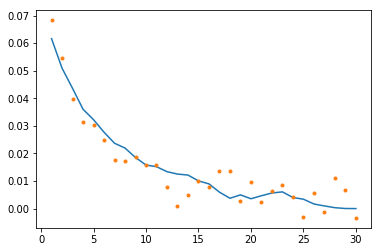

In [4]:
plt.plot(t[1:],x[1:])
plt.plot(t[1:],y,".")

In [5]:
def m(x,alpha):
    return alpha*x*(1-x)
def M(x,alpha):
    return alpha*(1-2*x)
def h(x):
    return x
def H(x):
    return 1

In [21]:
def Extended_Kalman(alpha,mean,sigma,q,r):
    n=len(t)-1
    forcast=np.zeros(n)
    forcast_u=np.zeros(n)
    mean_new=np.zeros(n)
    gain=np.zeros(n)
    sigma_new=np.zeros(n)
    mean_old=m(mean,alpha)
    sigma_old=q**2+M(sigma,alpha)*sigma*M(sigma,alpha)
    for i in range(0,n):
        forcast[i]=mean_old
        forcast_u[i]=sigma_old
        gain[i]=sigma_old*H(mean_old)*(H(mean_old)*sigma_old*H(mean_old)+r**2)**(-1)
        mean_new[i]=mean_old+gain[i]*(y[i]-h(mean_old))
        sigma_new[i]=(1-gain[i]*H(sigma_old))*sigma_old
        
        mean_old=m(mean_new[i],alpha)
        sigma_old=q**2+M(sigma_new[i],alpha)*sigma*M(sigma_new[i],alpha)
    return mean_new,sigma_new, gain,forcast

In [22]:
mean=0.1
sigma=0.01

mean_new,sigma_new, gain,forcast=Extended_Kalman(alpha,mean,sigma,q,r)

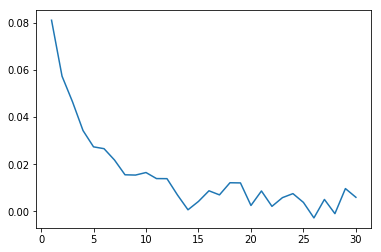

In [25]:
plt.plot(t[1:],forcast)

In [27]:
def Process(x0,alpha,q,r,T):
    t = np.linspace(0,T,T+1)
    x = np.zeros(len(t))
    x[0] = x0
    for i in range(1,len(t)):
        x[i]=alpha*x[i-1]*(1-x[i-1])+np.random.normal(0,q)
    y = x[1:]+np.random.normal(0,r,len(t)-1)
    return y,x,t


In [28]:
mu = 0.1
sigma = 0.01
x0 = np.random.normal(mu,sigma)
alpha = 0.9
q = 0.001
r = 0.005
T = 30
y,x,t = Process(x0,alpha,q,r,T)

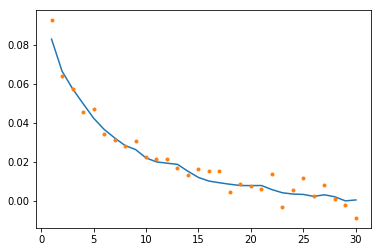

In [29]:
plt.plot(t[1:],x[1:])
plt.plot(t[1:],y, '.')

In [30]:
def m(x,alpha):
    return alpha*x*(1-x)

def M(x,alpha):
    return alpha*(1-2*x)

def h(x):
    return x

def H(x):
    return 1


In [31]:
def kalman1(sigma,mu,r2,q2,alpha):
    n = len(t)-1
    forecast_sig = np.zeros(n)
    forecast_mu = np.zeros(n)
    gain = np.zeros(n)
    mu_new = np.zeros(n)
    sigma_new = np.zeros(n)
    mu_old = m(mu,alpha)
    sigma_old = q2 + M(mu,alpha) * sigma * M(mu,alpha)
    
    for i in range(n):
        forecast_mu[i] = mu_old
        forecast_sig[i] = sigma_old
        gain[i] = sigma_old * H(mu_old) *(H(mu_old)*sigma_old*H(mu_old)+r2)**(-1)
        mu_new[i] = mu_old + gain[i] *(y[i]-h(mu_old))
        sigma_new[i] = (1-gain[i]*H(mu_old))*sigma_old
        mu_old =  m(mu_new[i],alpha)
        sigma_old = q2 + M(mu_new[i], alpha)*sigma_new[i]*M(mu_new[i], alpha)
    return mu_new, sigma_new, gain, forecast_mu, forecast_sig


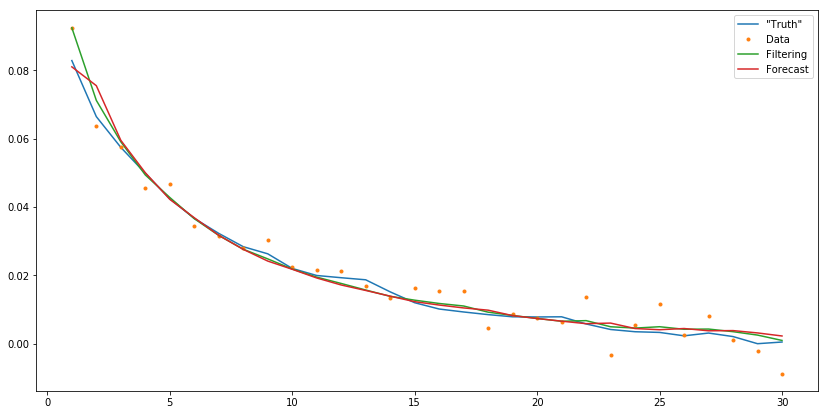

In [32]:
r2 = r**2
q2 = q**2

Post_Mean, Post_Var, K, ForecastM, ForecastS = kalman1(sigma,mu,r2,q2,alpha)


plt.figure(figsize=(14,7))
plt.plot(t[1:],x[1:])
plt.plot(t[1:],y, '.')
plt.plot(t[1:],Post_Mean)
plt.plot(t[1:],ForecastM)
plt.legend(['\"Truth\"','Data', 'Filtering', 'Forecast'])
plt.show()

In [ ]:
#r2 = 0.0005**2
r2 = 0.5**2
q2 = q**2

Post_Mean, Post_Var, K, ForecastM, ForecastS = kalman1(sigma,mu,r2,q2,alpha)


plt.figure(figsize=(14,7))
plt.plot(t[1:],x[1:])
plt.plot(t[1:],y, '.')
plt.plot(t[1:],Post_Mean)
plt.plot(t[1:],ForecastM)
plt.legend(['\"Truth\"','Data', 'Filtering', 'Forecast'])
plt.show()